In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

*Step:1 Data Load


Objctive: load images and labels from the dataset directory

In [ ]:
# define dataset path
data_dir = "/content/drive/MyDrive/day1/plant_disease"
categories = os.listdir(data_dir)

#load images and labels
images = []
labels = []

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir, category)
  for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img, (64, 64))
      images.append(img)
      labels.append(category)

# convert to numpy
X = np.array(images)
y = np.array(labels)

print("Labels",np.unique(y))
print("Data Shape", X.shape)
print("Label Shape", y.shape)

Pepper__bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Pepper__bell___Bacterial_spot
Labels ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
Data Shape (4649, 64, 64, 3)
Label Shape (4649,)


Class  Distribution:
Pepper__bell___healthy           1488
Potato___Late_blight             1010
Potato___Early_blight            1002
Pepper__bell___Bacterial_spot     997
Potato___healthy                  152
Name: count, dtype: int64


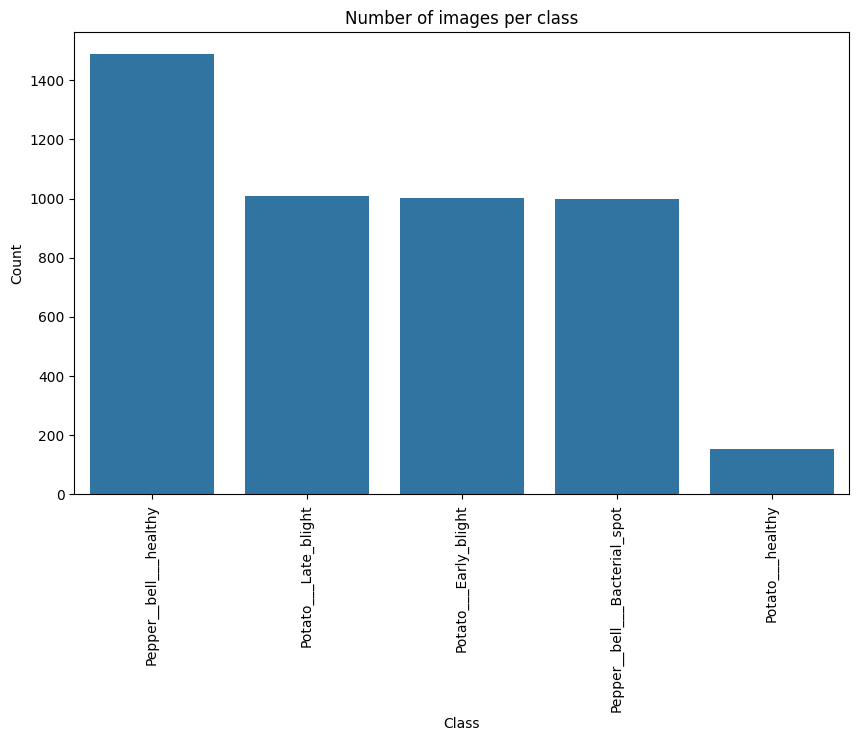

In [ ]:
# count images per class
class_counts = pd.Series(labels).value_counts()
print("Class  Distribution:")
print(class_counts)

#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Number of images per class")
plt.show()

Objective: Handle invalid or corrupted images and convert labels to numeric

In [ ]:
#Remove corrupted images (if any)
valid_images = []
valid_labels = []

for img, label in zip(X, y):
  if img.shape == (64, 64, 3):
    valid_images.append(img)
    valid_labels.append(label)
x= np.array(valid_images)
y= np.array(valid_labels)

print("Cleaned Data shape:", X.shape)

Cleaned Data shape: (4649, 64, 64, 3)


*Step: 4 Data Manipulation(Label Encoding)

Objective: Convert class labels (strings) to numeric form

In [ ]:
# Encode labels
le = LabelEncoder()
y_encoded= le.fit_transform(y)

#save class names for later use
class_names = le.classes_



In [ ]:
print(y_encoded)

[1 1 1 ... 0 0 0]


*Step: 5 visualization

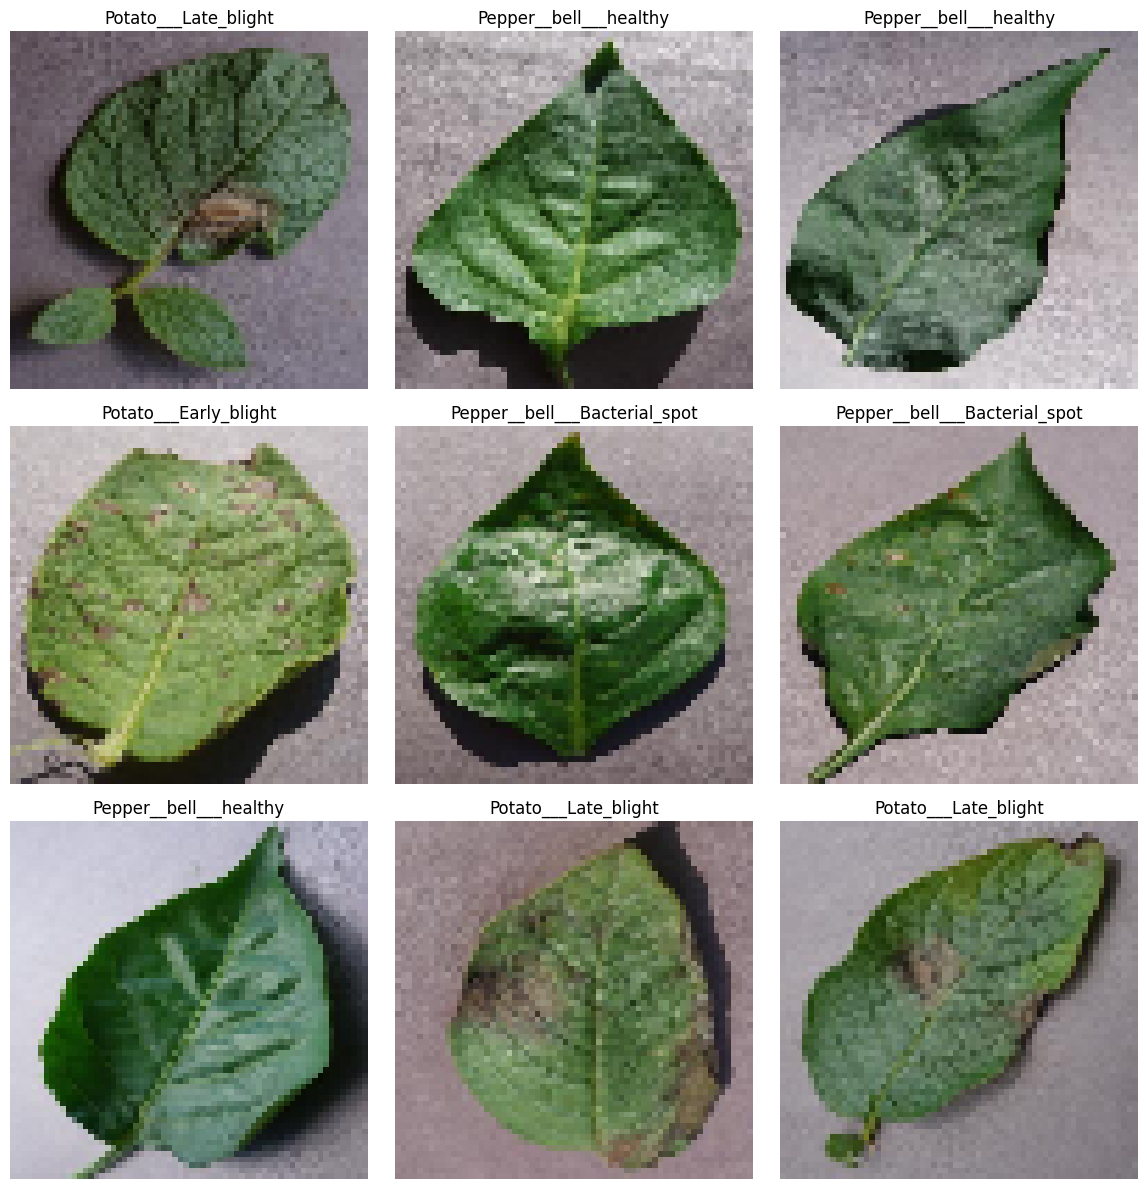

In [ ]:
# show sample images
import random

plt.figure(figsize=(12, 12))
for i in range(9):
  idx = random.randint(0, len(X))
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
  plt.tight_layout()
plt.show()


*Step:6 Feature engineering(color histograms)

Objective: Extract feature from images using color histogram

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
  #convert to HSV color space
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
  # Normalize and flatten the histogram
  hist = cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX).flatten()
  return hist

#extract features
hist_features = [extract_color_histogram(img) for img in X]
X_features = np.array(hist_features)

*step: 7 model selection:Logistic regression/SVM

Objective: choose a model for classification

In [ ]:
# choose model
# model = LogisticRegression(max_iter=1000)
model = SVC(kernel='rbf', C=10, gamma="scale")

*step:8 Trainig model

In [ ]:
# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_features,y_encoded, test_size=0.2, random_state=42)

#Train model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

*step:9 Model Evaluation

Accuracy: 0.9559139784946237
F1 Score: 0.9563584816760672


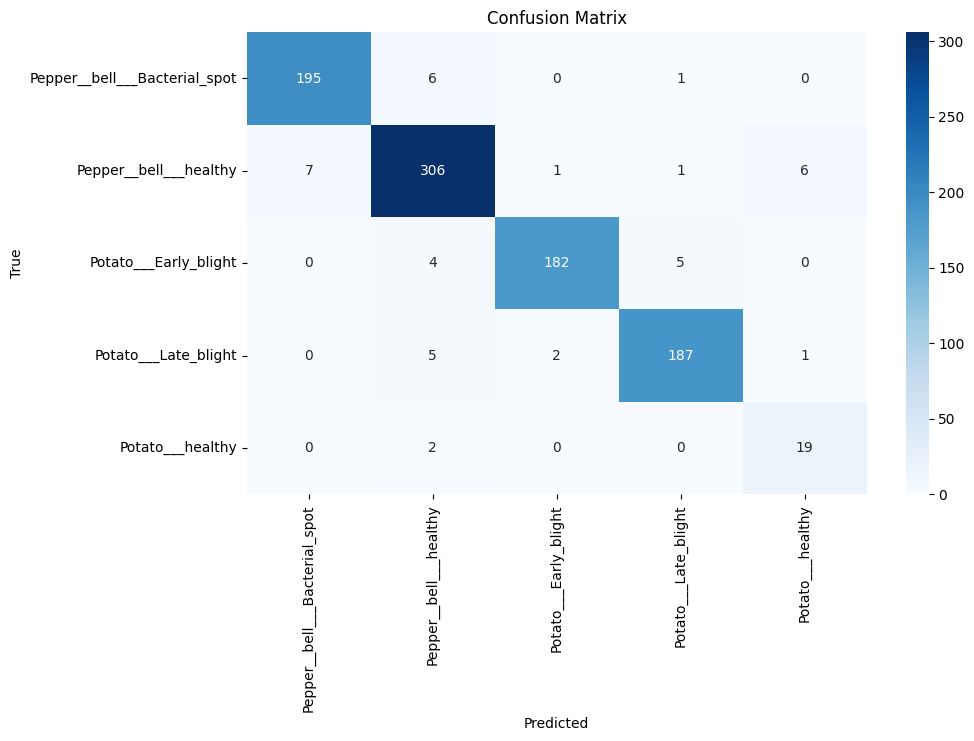

Classification Report:
                                precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.97      0.97      0.97       202
       Pepper__bell___healthy       0.95      0.95      0.95       321
        Potato___Early_blight       0.98      0.95      0.97       191
         Potato___Late_blight       0.96      0.96      0.96       195
             Potato___healthy       0.73      0.90      0.81        21

                     accuracy                           0.96       930
                    macro avg       0.92      0.95      0.93       930
                 weighted avg       0.96      0.96      0.96       930



In [ ]:
from sklearn.metrics import accuracy_score,f1_score ,confusion_matrix, classification_report
#accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)


f1 = f1_score(y_test,y_pred, average='weighted')
print("F1 Score:",f1)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)

#plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#classification report
cr = classification_report(y_test,y_pred,target_names=class_names)
print("Classification Report:\n",cr)

*step:10